In [6]:
!pip install opendatasets

In [1]:
import opendatasets as od
dataset = "https://www.kaggle.com/datasets/mexwell/pulse-transit-time"
od.download(dataset)

Skipping, found downloaded files in "./pulse-transit-time" (use force=True to force download)


In [4]:
import os 
data_dir= "./pulse-transit-time/pulse-transit-time-ppg/1.1.0/csv"

In [5]:
os.listdir(data_dir)

['index.html',
 's10_run.csv',
 's10_sit.csv',
 's10_walk.csv',
 's11_run.csv',
 's11_sit.csv',
 's11_walk.csv',
 's12_run.csv',
 's12_sit.csv',
 's12_walk.csv',
 's13_run.csv',
 's13_sit.csv',
 's13_walk.csv',
 's14_run.csv',
 's14_sit.csv',
 's14_walk.csv',
 's15_run.csv',
 's15_sit.csv',
 's15_walk.csv',
 's16_run.csv',
 's16_sit.csv',
 's16_walk.csv',
 's17_run.csv',
 's17_sit.csv',
 's17_walk.csv',
 's18_run.csv',
 's18_sit.csv',
 's18_walk.csv',
 's19_run.csv',
 's19_sit.csv',
 's19_walk.csv',
 's1_run.csv',
 's1_sit.csv',
 's1_walk.csv',
 's20_run.csv',
 's20_sit.csv',
 's20_walk.csv',
 's21_run.csv',
 's21_sit.csv',
 's21_walk.csv',
 's22_run.csv',
 's22_sit.csv',
 's22_walk.csv',
 's2_run.csv',
 's2_sit.csv',
 's2_walk.csv',
 's3_run.csv',
 's3_sit.csv',
 's3_walk.csv',
 's4_run.csv',
 's4_sit.csv',
 's4_walk.csv',
 's5_run.csv',
 's5_sit.csv',
 's5_walk.csv',
 's6_run.csv',
 's6_sit.csv',
 's6_walk.csv',
 's7_run.csv',
 's7_sit.csv',
 's7_walk.csv',
 's8_run.csv',
 's8_sit.cs

In [3]:
import pandas as pd 

In [6]:
s1_sit_dataset= pd.read_csv(data_dir+"/s1_sit.csv")

In [7]:
print(s1_sit_dataset.head())
print(s1_sit_dataset.info())

                         time    ecg  peaks  pleth_1  pleth_2  pleth_3  \
0  2021-01-01 16:42:18.569309  30736      0    71695    73737     5743   
1  2021-01-01 16:42:18.571309  30714      0    71680    73726     5752   
2  2021-01-01 16:42:18.573309  30703      0    71680    73726     5752   
3  2021-01-01 16:42:18.575309  30697      0    71693    73727     5743   
4  2021-01-01 16:42:18.577309  30698      0    71691    73722     5749   

   pleth_4  pleth_5  pleth_6     lc_1     lc_2  temp_1  temp_2     temp_3  \
0    84690    92770     6159  7099667  6276765   33.81    36.5  33.705544   
1    84678    92759     6160  7099667  6276765   33.81    36.5  33.708538   
2    84678    92759     6160  7099667  6276765   33.81    36.5  33.708538   
3    84698    92762     6156  7101208  6277398   33.81    36.5  33.708538   
4    84690    92762     6165  7101208  6277398   33.81    36.5  33.708538   

        a_x       a_y       a_z       g_x       g_y       g_z  
0  4.298409  1.371349 -8.450

In [ ]:
#s1_run_dataset= pd.read_csv(data_dir+"/s1_run.csv")
#print(s1_run_dataset)

In [ ]:
#s1_walk_dataset= pd.read_csv(data_dir+"/s1_walk.csv")
#print(s1_walk_dataset)

### Calculate Heart Rate (HR)

In [9]:
from scipy.signal import find_peaks

# Find peaks in the ECG signal
peaks, _ = find_peaks(s1_sit_dataset['ecg'], distance=200)
peak_times = s1_sit_dataset['time'].iloc[peaks]

# Calculate HR as number of peaks per minute
hr = 60 / (pd.to_datetime(peak_times).diff().mean().total_seconds())
print(f'Heart Rate (HR): {hr:.2f} BPM')


Heart Rate (HR): -16.24 BPM


### Calculate Breathing Rate (BR)

In [10]:
# Find peaks in the PPG signal (using pleth_1 as an example)
ppg_peaks, _ = find_peaks(s1_sit_dataset['pleth_1'], distance=200)
ppg_peak_times = s1_sit_dataset['time'].iloc[ppg_peaks]

# Calculate BR as number of peaks per minute
br = 60 / (pd.to_datetime(ppg_peak_times).diff().mean().total_seconds())
print(f'Breathing Rate (BR): {br:.2f} BPM')


Breathing Rate (BR): -16.60 BPM


### Calculate DeltaSpO2

In [31]:
# Using pleth_1 (red) and pleth_2 (infrared) signals
red_signal = s1_sit_dataset['pleth_1']
infrared_signal = s1_sit_dataset['pleth_2']

# Calculate ratio of ratios
ratio_of_ratios = (red_signal / red_signal.mean()) / (infrared_signal / infrared_signal.mean())

# Simplified estimation of SpO2
spo2 = 110 - 25 * ratio_of_ratios.mean()
print(f'SpO2: {spo2:.2f} %')


SpO2: 85.00 %


### Calculate Stress Level

In [11]:
import numpy as np
# Convert peak_times to datetime if they are not already
peak_times = pd.to_datetime(s1_sit_dataset['time'].iloc[peaks])

# Calculate HRV as the standard deviation of the intervals between heartbeats
rr_intervals = peak_times.diff().dropna().dt.total_seconds()
hrv = rr_intervals.std()

# Simple stress level estimation
stress_level = np.log(hrv)
print(f'Stress Level: {stress_level:.2f}')


Stress Level: 4.90


In [41]:
!pip install heartpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.9 MB/s eta 0:00:00:00:0100:01


<Figure size 1200x600 with 0 Axes>

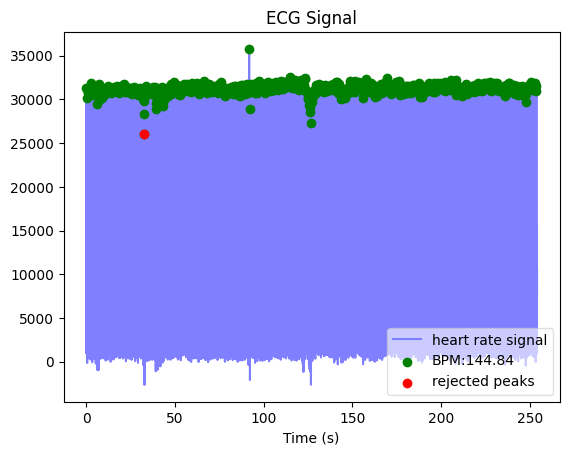

<Figure size 1200x600 with 0 Axes>

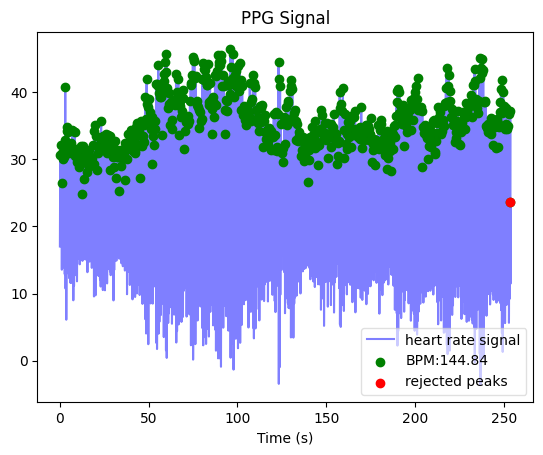

In [12]:
import pandas as pd
import heartpy as hp
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Ensure 'time' column is in datetime format
s1_sit_dataset['time'] = pd.to_datetime(s1_sit_dataset['time'])

# Extract ECG and PPG signals
ecg_signal = s1_sit_dataset['ecg'].values
ppg_signal = s1_sit_dataset['pleth_3'].values  # Use pleth_1 as an example

# Define the sample rate (Hz)
sample_rate = 1000.0  # Adjust this to your data's actual sample rate

# Function to apply a Butterworth bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Apply a bandpass filter to the ECG signal
filtered_ecg_signal = butter_bandpass_filter(ecg_signal, 0.5, 50.0, sample_rate, order=2)

# Apply a bandpass filter to the PPG signal
filtered_ppg_signal = butter_bandpass_filter(ppg_signal, 0.5, 5.0, sample_rate, order=2)

# Process ECG signal
wd, m = hp.process(filtered_ecg_signal, sample_rate=sample_rate)

# Visualize ECG signal
plt.figure(figsize=(12, 6))
hp.plotter(wd, m)
plt.title('ECG Signal')
plt.show()

# Process PPG signal
try:
    wd_ppg, m_ppg = hp.process(filtered_ppg_signal, sample_rate=sample_rate)

    # Visualize PPG signal
    plt.figure(figsize=(12, 6))
    hp.plotter(wd_ppg, m_ppg)
    plt.title('PPG Signal')
    plt.show()

except hp.exceptions.BadSignalWarning as e:
    print(f"Could not process PPG signal: {e}")
